In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
import chardet 
file='spam.csv'
with open(file, 'rb') as rawdata: 
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7270322499829184, 'encoding': 'Windows-1252', 'language': ''}

In [3]:
import pandas as pd
data = pd.read_csv("spam.csv",encoding="Windows-1252")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [5]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"] ,axis = 1 ,inplace = True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Data Cleaning
data.duplicated().sum()  

403

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [10]:
data.dropna( inplace = True )
data.shape

(5169, 2)

In [11]:
# function to preprocess the data
stopword = set(stopwords.words('english'))
def preprocessing(text):
    text = text.lower()    # Convert text to lowercase
    
    text = re.sub(r'[^\w\s]', '', text)   # Remove punctuation
    
    text = re.sub(r'[#@\$]', '', text)    # Remove specific characters #, @, and $
    
    tokens = text.split()

    text = [token for token in tokens]
    
    text = [word for word in text if word not in stopword]
    
    return " ".join(text) 

In [12]:
data["cleaned_sms"] =  data["v2"].apply(preprocessing)
data.head()

,v1,v2,cleaned_sms
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [13]:
#v1 - tareget
#v2 - sms
data["v1"].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['encoded_target'] = label_encoder.fit_transform(data['v1'])


class_names= list(label_encoder.classes_)
class_names

['ham', 'spam']

In [15]:
data.head()

,v1,v2,cleaned_sms,encoded_target
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,0


In [16]:
# Split the data
x = data["cleaned_sms"]
y = data["encoded_target"]

vectorizer = TfidfVectorizer()
x_trans= vectorizer.fit_transform(x)

x_train ,x_test ,y_train ,y_test = train_test_split(x_trans ,y ,test_size = 0.3 ,random_state = 42)

In [17]:
# Function for training amd testing

def model_train_test(model):
    model.fit(x_train ,y_train)
    print("Model Score on Training data",model.score(x_train ,y_train))
    print("Model Score on Testing data",model.score(x_test ,y_test))
    y_pred = model.predict(x_test)
    print(classification_report(y_pred ,y_test))
    lr_accuracy = accuracy_score(y_pred,y_test)
    print("Accuracy Score : ",(lr_accuracy*100),"%")

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 6))  
    sns.heatmap(cm, annot=True, fmt='d', cbar=False,xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    return model

Model Score on Training data 0.9527363184079602
Model Score on Testing data 0.9284332688588007
             precision    recall  f1-score   support

          0       0.99      0.93      0.96      1428
          1       0.53      0.94      0.68       123

avg / total       0.96      0.93      0.94      1551

Accuracy Score :  92.84332688588007 %


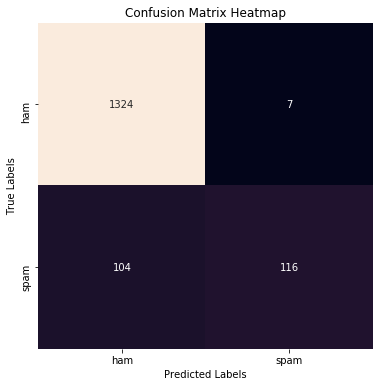

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# Logistic Regression
lr = LogisticRegression()
model_train_test(lr)

Model Score on Training data 0.9975124378109452
Model Score on Testing data 0.9754996776273372
             precision    recall  f1-score   support

          0       1.00      0.97      0.99      1365
          1       0.84      0.99      0.91       186

avg / total       0.98      0.98      0.98      1551

Accuracy Score :  97.54996776273373 %


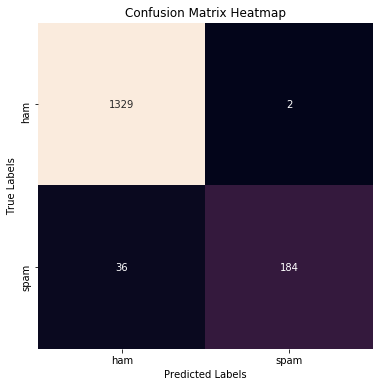

In [19]:
#SVM
svc = SVC(C=1.2 ,kernel = "linear")
model = model_train_test(svc)